ANALISI DELLE COMPONENTI PRINCIPALI - PCA

PCA è una tecnica di riduzione della dimensionalità che si basa sulla decomposizione della matrice di covarianza. La matrice di covarianza è una matrice quadrata che contiene le varianze e le covarianze dei diversi attributi. La diagonale della matrice contiene le varianze di ogni attributo, mentre le altre celle contengono le covarianze tra ogni coppia di attributi. 

 - https://it.wikipedia.org/wiki/Analisi_delle_componenti_principali

La PCA anche nota come trasformata di Karhunen-Loève, è una tecnica per la semplificazione dei dati utilizzata nell'ambito della statistica multivariata. Questo metodo fu proposto per la prima volta nel 1901 da Karl Pearson e sviluppato poi da Harold Hotelling nel 1933, e fa parte dell'analisi fattoriale. La tecnica, esempio di riduzione della dimensionalità, ha lo scopo di ridurre il numero più o meno elevato di variabili che descrivono un insieme di dati a un numero minore di variabili latenti, limitando il più possibile la perdita di informazioni. 

In [1]:
# realizzai un esempio di PCA con il dataset iris
# importo le librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.

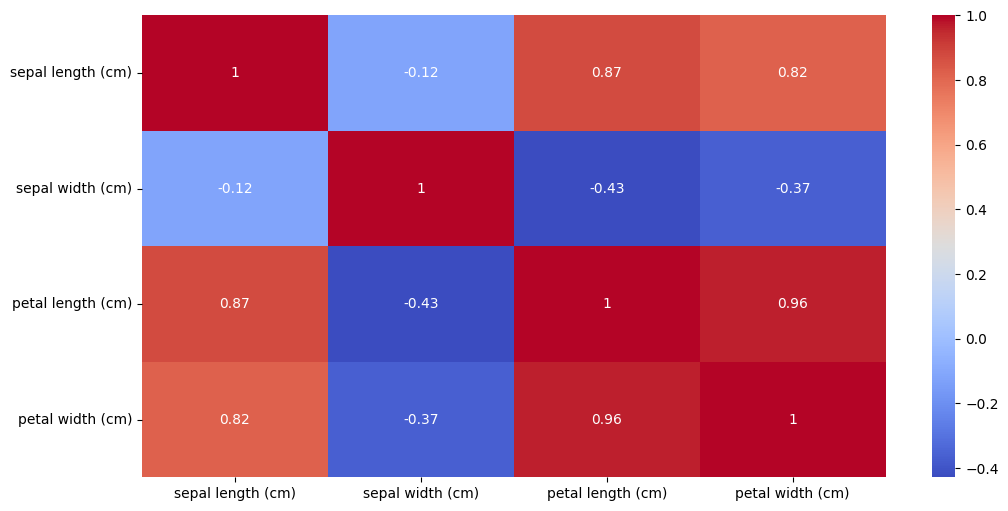

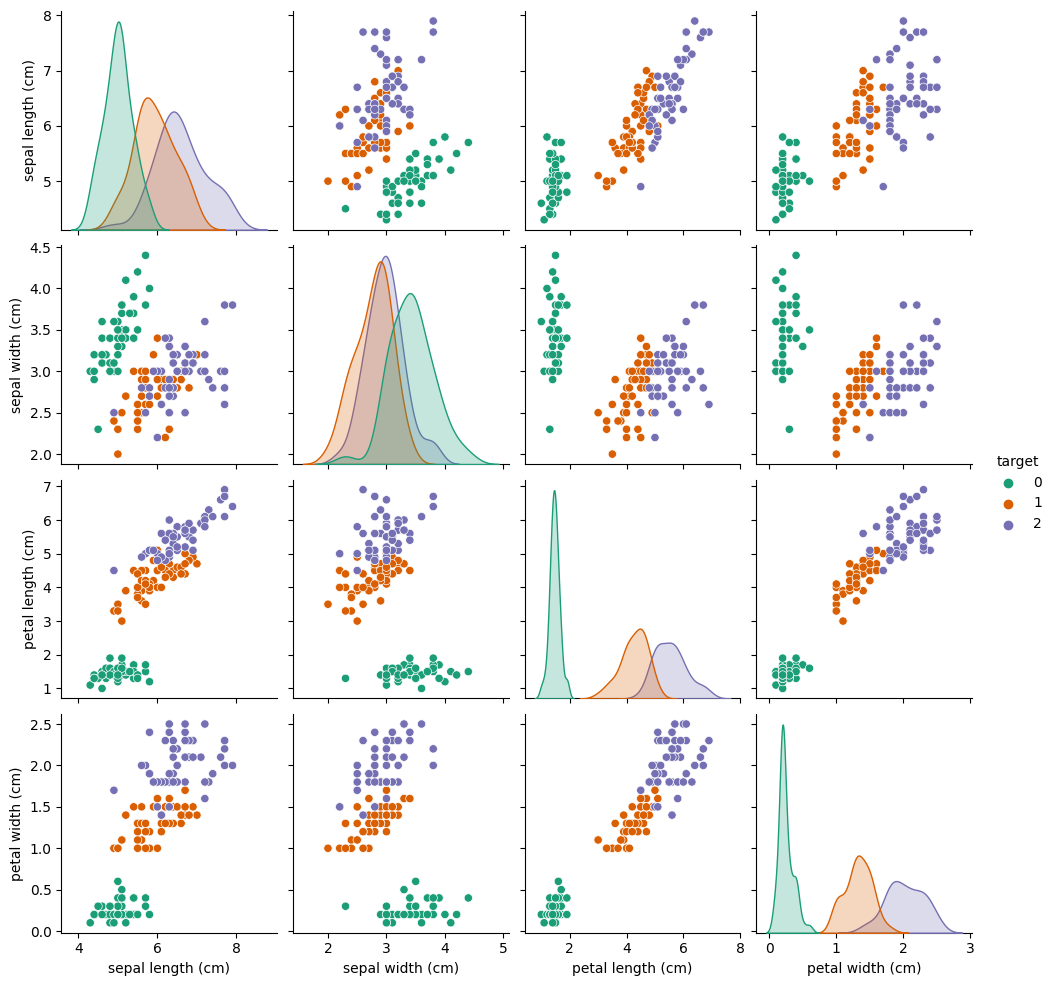

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


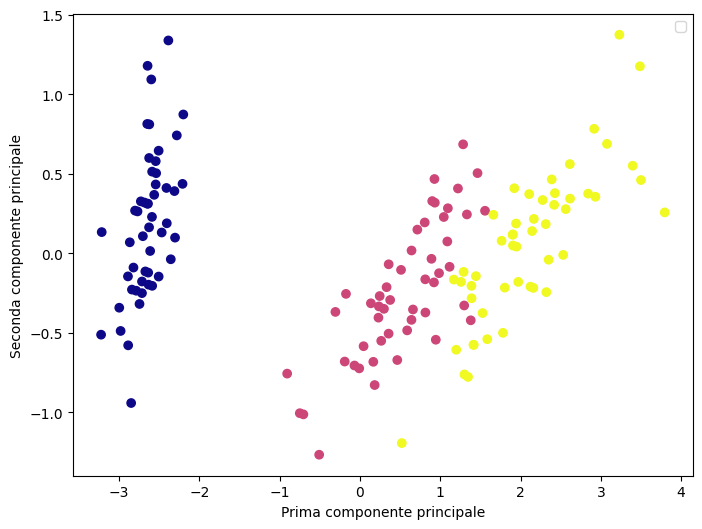

In [10]:
# importo il dataset
from sklearn.datasets import load_iris
iris = load_iris()

# creo il dataframe
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
#df['target'] = df['target'].apply(lambda x: iris['target_names'][x])

# visualizzo il dataframe
print(df.head())

# visualizziamo le correlazioni
corr = df.drop('target', axis=1).corr()
print(corr)

# creo il grafico
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# visualizzo il grafico
sns.pairplot(df, hue='target', palette='Dark2')
plt.show()

# creo il modello
from sklearn.decomposition import PCA

# creo l'istanza
pca = PCA(n_components=2)

# addestro il modello
# questa operazioione serve per trovare le componenti principali escludendo la colonna target
pca.fit(df.drop('target', axis=1))

# trasformo il dataset
# questa operazione serve per ridurre le dimensioni del dataset da 4 a 2 dimensioni escludendo la colonna target
x_pca = pca.transform(df.drop('target', axis=1))

# creo il grafico
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['target'], cmap='plasma')
plt.xlabel('Prima componente principale')
plt.ylabel('Seconda componente principale')
plt.show()